<a href="https://colab.research.google.com/github/Denis060/stock-prediction-project/blob/main/Project_1_Ibrahim_Denis_Fofanah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT **1**

---

SUBMITTED BY **IBRAHIM DENIS FOFANAH**

STUDENT ID#: U01976304



Submitted to:

> Professor Shubham Sawant

> October 29, 2024

CS 677 Machine Learning

In [ ]:
#Importing Yahoo Finance, A library that allows for the downloading of hisrorical stock market data.
import yfinance as yf
import pandas as pd

In [ ]:
#downloading the historical data using yfinance
data=yf.download("AAPL",start="2017-01-01",end="2023-01-01")

[*********************100%***********************]  1 of 1 completed


In [ ]:
#print the head of the data to get a clue of the data
print(data.head())

Price                      Adj Close      Close       High        Low  \
Ticker                          AAPL       AAPL       AAPL       AAPL   
Date                                                                    
2017-01-03 00:00:00+00:00  26.921549  29.037500  29.082500  28.690001   
2017-01-04 00:00:00+00:00  26.891413  29.004999  29.127501  28.937500   
2017-01-05 00:00:00+00:00  27.028170  29.152500  29.215000  28.952499   
2017-01-06 00:00:00+00:00  27.329481  29.477501  29.540001  29.117500   
2017-01-09 00:00:00+00:00  27.579809  29.747499  29.857500  29.485001   

Price                           Open     Volume  
Ticker                          AAPL       AAPL  
Date                                             
2017-01-03 00:00:00+00:00  28.950001  115127600  
2017-01-04 00:00:00+00:00  28.962500   84472400  
2017-01-05 00:00:00+00:00  28.980000   88774400  
2017-01-06 00:00:00+00:00  29.195000  127007600  
2017-01-09 00:00:00+00:00  29.487499  134247600  


In [ ]:
#printing out the information of the dataset to know the datatypes, columns etc
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2017-03-15 00:00:00+00:00 to 2022-12-30 00:00:00+00:00
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  1461 non-null   float64
 1   (Close, AAPL)      1461 non-null   float64
 2   (High, AAPL)       1461 non-null   float64
 3   (Low, AAPL)        1461 non-null   float64
 4   (Open, AAPL)       1461 non-null   float64
 5   (Volume, AAPL)     1461 non-null   int64  
 6   (Target, )         1461 non-null   int64  
 7   (Daily_Return, )   1461 non-null   float64
 8   (MA_10, )          1461 non-null   float64
 9   (MA_50, )          1461 non-null   float64
 10  (Volatility_10, )  1461 non-null   float64
 11  (Volume_MA_10, )   1461 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 148.4 KB


In [ ]:
#Checking for null values and possible sum them if any
data.isnull().sum()

,,0
Price,Ticker,
Adj Close,AAPL,0
Close,AAPL,0
High,AAPL,0
Low,AAPL,0
Open,AAPL,0
Volume,AAPL,0
Target,,0
Daily_Return,,0
MA_10,,0


In [ ]:
#importing numpy library since I have to do some mathematical calculations
import numpy as np

In [ ]:
#Creating the target variable
data['Target']=np.where(data['Close'].shift(-1)>data['Close'],1,-1)

In [ ]:
#pprinting the target variable
data[['Close','Target']].head()

Price,Close,Target
Ticker,AAPL,
Date,,
2017-01-03 00:00:00+00:00,29.037500,-1
2017-01-04 00:00:00+00:00,29.004999,1
2017-01-05 00:00:00+00:00,29.152500,1
2017-01-06 00:00:00+00:00,29.477501,1
2017-01-09 00:00:00+00:00,29.747499,1


In [ ]:
#calculation of daily returns
data['Daily_Return'] = data['Close'].pct_change()

#calculation of 10-day and 50-day moving averages of the clsoing price
data['MA_10'] = data['Close'].rolling(window=10).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()


In [ ]:
#calculation of 10-day volatility ( standad deviation of daily returns)
data['Volatility_10'] = data['Daily_Return'].rolling(window=10).std()

In [ ]:
#calculation of 10-day moving average of volume
data['Volume_MA_10'] = data['Volume'].rolling(window=10).mean()

In [ ]:
#printing out the data again to see the calculated columns I added
data.head()

Price,Adj Close,Close,High,Low,Open,Volume,Target,Daily_Return,MA_10,MA_50,Volatility_10,Volume_MA_10
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,
Date,,,,,,,,,,,,
2017-03-15 00:00:00+00:00,32.697330,35.115002,35.187500,34.757500,34.852501,102767200,1,0.010576,34.826750,32.32415,0.004986,82165560.0
2017-03-16 00:00:00+00:00,32.750874,35.172501,35.255001,35.064999,35.180000,76928000,-1,0.001637,34.870000,32.44685,0.004448,79373960.0
2017-03-17 00:00:00+00:00,32.587925,34.997501,35.250000,34.972500,35.250000,175540000,1,-0.004975,34.875250,32.56670,0.004513,88484720.0
2017-03-20 00:00:00+00:00,32.930122,35.365002,35.375000,35.057499,35.099998,86168000,-1,0.010501,34.928251,32.69095,0.005382,88401520.0
2017-03-21 00:00:00+00:00,32.553005,34.959999,35.700001,34.932499,35.527500,158119600,1,-0.011452,34.936250,32.80060,0.006772,97234960.0


In [ ]:
#checkoing for null values again after adding some calculated columns
data.isnull().sum()

,,0
Price,Ticker,
Adj Close,AAPL,0
Close,AAPL,0
High,AAPL,0
Low,AAPL,0
Open,AAPL,0
Volume,AAPL,0
Target,,0
Daily_Return,,0
MA_10,,0


In [ ]:
#dropping any null values after the calculation
data.dropna(inplace=True)


In [ ]:
#checking the data again after dropping the null values
data.head()

Price,Adj Close,Close,High,Low,Open,Volume,Target,Daily_Return,MA_10,MA_50,Volatility_10,Volume_MA_10
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,
Date,,,,,,,,,,,,
2017-03-15 00:00:00+00:00,32.697330,35.115002,35.187500,34.757500,34.852501,102767200,1,0.010576,34.826750,32.32415,0.004986,82165560.0
2017-03-16 00:00:00+00:00,32.750874,35.172501,35.255001,35.064999,35.180000,76928000,-1,0.001637,34.870000,32.44685,0.004448,79373960.0
2017-03-17 00:00:00+00:00,32.587925,34.997501,35.250000,34.972500,35.250000,175540000,1,-0.004975,34.875250,32.56670,0.004513,88484720.0
2017-03-20 00:00:00+00:00,32.930122,35.365002,35.375000,35.057499,35.099998,86168000,-1,0.010501,34.928251,32.69095,0.005382,88401520.0
2017-03-21 00:00:00+00:00,32.553005,34.959999,35.700001,34.932499,35.527500,158119600,1,-0.011452,34.936250,32.80060,0.006772,97234960.0


In [ ]:
#Check for null values again, fortunaltely there are none since I had deleted them earlier
data.isnull().sum()

,,0
Price,Ticker,
Adj Close,AAPL,0
Close,AAPL,0
High,AAPL,0
Low,AAPL,0
Open,AAPL,0
Volume,AAPL,0
Target,,0
Daily_Return,,0
MA_10,,0


In [ ]:
#importing the visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# **Visualiing Key Variables**

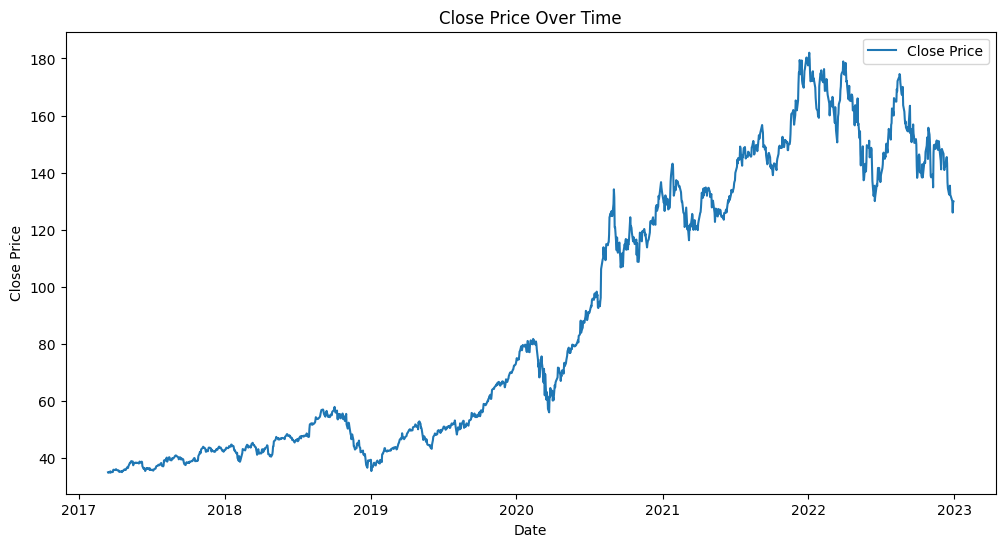

In [ ]:
#Visualising Closing price Over Time
plt.figure(figsize=(12,6))
plt.plot(data.index,data['Close'],label='Close Price')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

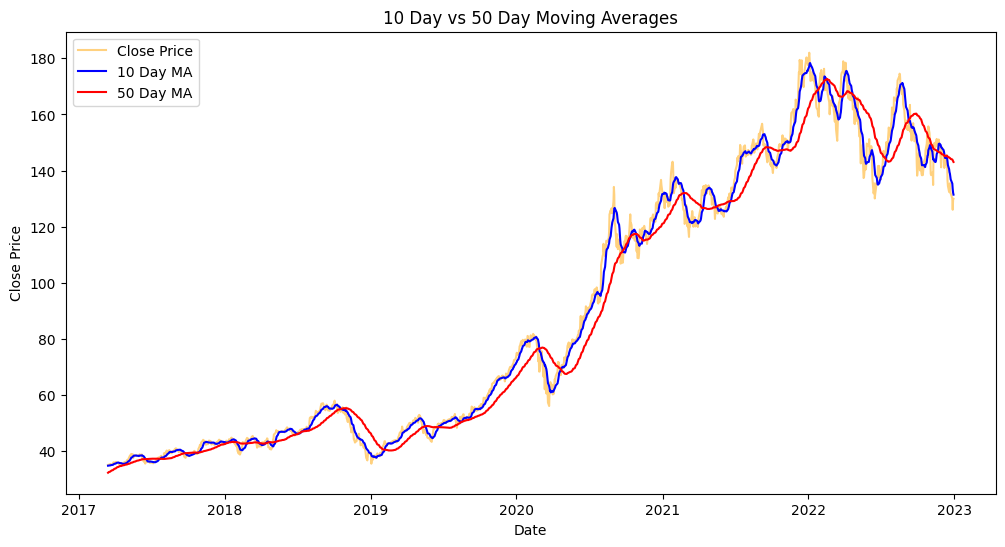

In [ ]:
#10 Day vs 50 Day Moving Averages
plt.figure(figsize=(12,6))
plt.plot(data.index,data['Close'],label='Close Price', color='orange', alpha=0.5)
plt.plot(data.index,data['MA_10'],label='10 Day MA', color='blue')
plt.plot(data.index,data['MA_50'],label='50 Day MA', color='red')
plt.title('10 Day vs 50 Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

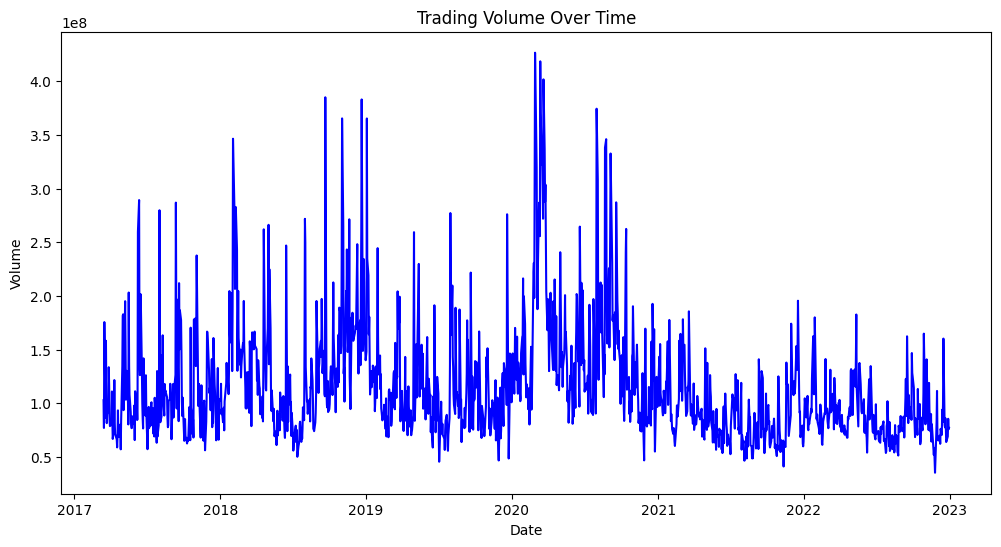

In [ ]:
#Daily Returns Histogram
plt.figure(figsize=(12,6))
plt.plot(data.index,data['Volume'], color='blue')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

In [ ]:
#Defining feature variable (X) and target variable(y)
X=data[['Close','Volume','MA_10','MA_50','Volatility_10','Volume_MA_10','Daily_Return']]
y=data['Target']

In [ ]:
#printing out the features (X) and label (y) variable
print(X.head())
print(y.head())

Price                          Close     Volume      MA_10     MA_50  \
Ticker                          AAPL       AAPL                        
Date                                                                   
2017-03-15 00:00:00+00:00  35.115002  102767200  34.826750  32.32415   
2017-03-16 00:00:00+00:00  35.172501   76928000  34.870000  32.44685   
2017-03-17 00:00:00+00:00  34.997501  175540000  34.875250  32.56670   
2017-03-20 00:00:00+00:00  35.365002   86168000  34.928251  32.69095   
2017-03-21 00:00:00+00:00  34.959999  158119600  34.936250  32.80060   

Price                     Volatility_10 Volume_MA_10 Daily_Return  
Ticker                                                             
Date                                                               
2017-03-15 00:00:00+00:00      0.004986   82165560.0     0.010576  
2017-03-16 00:00:00+00:00      0.004448   79373960.0     0.001637  
2017-03-17 00:00:00+00:00      0.004513   88484720.0    -0.004975  
2017-03-20 00:0

In [ ]:
#importing train_test_split to split the data into traing and testing
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the standardized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
#Printing the shape of the train and testing data
print("The shape of the Train Feautures are: ",X_train.shape)
print("The shape of the Test Feautures are: ",X_test.shape)
print("The shape of the Train Label are: ",y_train.shape)
print("The shape of the Test Label are: ",y_test.shape)

The shape of the Train Feautures are:  (1168, 7)
The shape of the Test Feautures are:  (293, 7)
The shape of the Train Label are:  (1168,)
The shape of the Test Label are:  (293,)


In [ ]:
#import the models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#imporing tools to measure the performance of models, such as accuracy, F1 score, confusion matrix, and classification report.
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report

In [ ]:
#creating a dictionary to store the models
models={
    'Decision Tree':DecisionTreeClassifier(),
    'K-Nearest Neighbors':KNeighborsClassifier()
}

In [ ]:
# an empty disctionary to store the accuray of the models
model_accuracy={}
f1_scores_dictionary={}

In [ ]:
# using a for loop for the Training, predicting, and evaluation of each model
for model_name, model in models.items():

    #fitting the models
    model.fit(X_train,y_train)

    #Making predictions on the model
    y_pred=model.predict(X_test)

    #calculating the accuracy of the model
    accuracy=accuracy_score(y_test,y_pred)

    # Calculate F1 score and store it in a variable
    f1 = f1_score(y_test, y_pred)

    #Calculateing the confusion Matrix
    cm=confusion_matrix(y_test,y_pred)
    c_report=classification_report(y_test,y_pred)

    #storing the accuracy in the dictionary
    model_accuracy[model_name]=accuracy

    # Store the calculated F1 score in the dictionary
    f1_scores_dictionary[model_name] = f1

    #printing the results with evaluation metrics
    print(f'{model_name} Classifier Accuracy: {accuracy * 100:.2f}%')
    print(f'{model_name} Classifier F1 Score: {f1 * 100:.2f}%')
    print(f'{model_name} Confusion Matrix:\n{cm}\n')
    print(f'{model_name} Classification Report:\n{c_report}\n')
    print(f'{model_name} Classifier Accuracy: {accuracy * 100:.2f}%')
    print()



Decision Tree Classifier Accuracy: 46.76%
Decision Tree Classifier F1 Score: 50.63%
Decision Tree Confusion Matrix:
[[57 81]
 [75 80]]

Decision Tree Classification Report:
              precision    recall  f1-score   support

          -1       0.43      0.41      0.42       138
           1       0.50      0.52      0.51       155

    accuracy                           0.47       293
   macro avg       0.46      0.46      0.46       293
weighted avg       0.47      0.47      0.47       293


Decision Tree Classifier Accuracy: 46.76%

K-Nearest Neighbors Classifier Accuracy: 50.17%
K-Nearest Neighbors Classifier F1 Score: 54.09%
K-Nearest Neighbors Confusion Matrix:
[[61 77]
 [69 86]]

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

          -1       0.47      0.44      0.46       138
           1       0.53      0.55      0.54       155

    accuracy                           0.50       293
   macro avg       0.50      0.50      0.

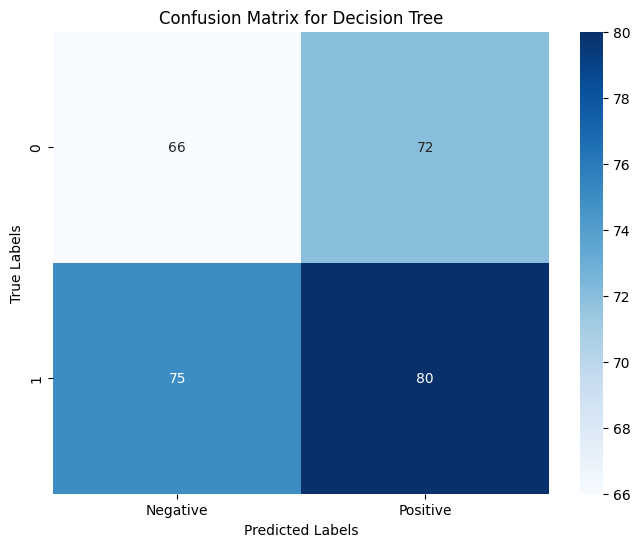

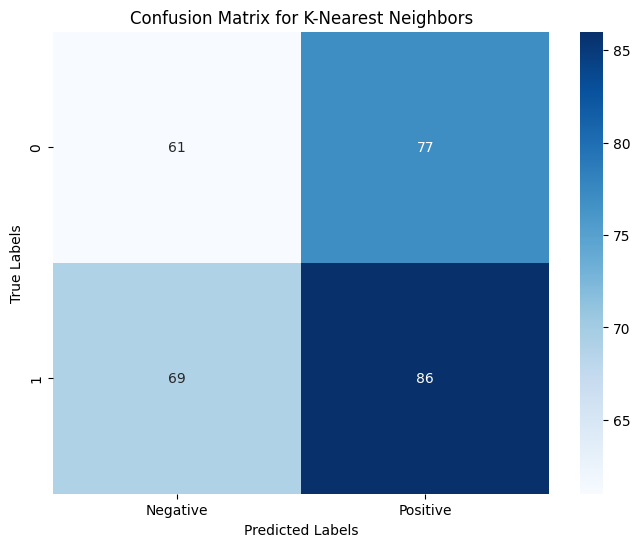

In [ ]:
#Nnow ploting the confusionm matrix for each model
for model_name, model in models.items():
  y_pred=model.predict(X_test)

  cm=confusion_matrix(y_test,y_pred)
  plt.figure(figsize=(8,6))
  sns.heatmap(cm,annot=True,fmt='d',cmap='Blues', xticklabels=['Negative','Positive'])
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title(f'Confusion Matrix for {model_name}')
  plt.show()

# **DETERMINING THE BEST MODEL**

In [ ]:
best_model=max(model_accuracy,key=model_accuracy.get)
print(f'\nThe best model is {best_model} with an accuracy of {model_accuracy[best_model]:.2f}')
print(f'\nThe best model is {best_model} with an f1 score of {f1_scores_dictionary[best_model]*100 :.2f}%')


The best model is K-Nearest Neighbors with an accuracy of 0.50

The best model is K-Nearest Neighbors with an f1 score of 54.09%


# **Conclusion:**
After evaluating both the Decision Tree and K-Nearest Neighbors classifiers, I found the following:

The K-Nearest Neighbors classifier achieved the highest accuracy, which means it made the most correct predictions overall, with an accuracy of 50.17%.
However, the K-Nearest Neighbors classifier had the highest F1 score at 54.09%. This means that it strikes a good balance between precision and recall, which is especially important when trying to minimize both false positives and false negatives.

In financial trading, both false positives and false negatives carry significant costs. Incorrectly predicting a **'buy'** could lead to unnecessary investments, while missing a **'buy'** signal could lead to lost opportunities.

Therefore, the model with the highest F1 score, which in this case is the **K-Nearest Neighbors classifier**, would be more reliable for predicting buy and sell signals. It provides a better balance between avoiding wrong predictions and capturing true opportunities, making it the better choice for real-world trading decisions.